In [4]:
### 1.) Consider this linear recursion:  f(n) = .5*f(n-1) + .5*f(n-3) 

# a.) Write the matrix A that will represent this recursion: A * \[ f(n-1), f(n-2), f(n-3) \]^T = \[ f(n), f(n-1), f(n-2) \]^T
import numpy as np

# Create matrix A
A = np.array([
    [0.5, 0, 0.5],
    [1, 0, 0],
    [0, 1, 0]
])

print("Matrix A:")
print(A)

# We'll store this for later use in parts b and c
# Initial condition vectors will be [f(3), f(2), f(1)]^T

# For part b:
x_b = np.array([3, 1, 1])

# Calculate f(15) using matrix multiplication
result_b = x_b.copy()
for _ in range(12):  # Need 12 iterations to get from f(3) to f(15)
    result_b = A @ result_b
print("\nf(15) with initial conditions f(1)=1, f(2)=1, f(3)=3:")
print(result_b[0])  # First element is f(15)

# For part c:
x_c = np.array([1, 1, 1])

# Calculate sequence with f(1)=f(2)=f(3)=1
result_c = x_c.copy()
print("\nSequence with initial conditions f(1)=f(2)=f(3)=1:")
for i in range(12):  # Calculate up to f(15) to see the pattern
    result_c = A @ result_c
    print(f"f({i+4}) = {result_c[0]}")


# **2.) (15 points)** Consider the dynamical system \( z_n = (z_{n-1})^2 + c \). Starting with \( z_0 = 0 \):

# a.) Compute \( z_3 \) if \( c = -0.25 + 0.25i \)
c = -0.25 + 0.25j

# Starting with z0 = 0
z0 = 0
z1 = z0**2 + c  # z1 = -0.25 + 0.25i
z2 = z1**2 + c  # z2 = (-0.25 + 0.25i)^2 + (-0.25 + 0.25i)
z3 = z2**2 + c  # z3 = z2^2 + (-0.25 + 0.25i)

print(f"For c = -0.25 + 0.25i:")
print(f"z1 = {z1}")
print(f"z2 = {z2}")
print(f"z3 = {z3}")

# b.) Compute \( z_3 \) if \( c = -0.25 + 0.8i \)
c = -0.25 + 0.8j

# Starting with z0 = 0 again
z0 = 0
z1 = z0**2 + c  # z1 = -0.25 + 0.8i
z2 = z1**2 + c  # z2 = (-0.25 + 0.8i)^2 + (-0.25 + 0.8i)
z3 = z2**2 + c  # z3 = z2^2 + (-0.25 + 0.8i)

print(f"\nFor c = -0.25 + 0.8i:")
print(f"z1 = {z1}")
print(f"z2 = {z2}")
print(f"z3 = {z3}")


Matrix A:
[[0.5 0.  0.5]
 [1.  0.  0. ]
 [0.  1.  0. ]]

f(15) with initial conditions f(1)=1, f(2)=1, f(3)=3:
1.98876953125

Sequence with initial conditions f(1)=f(2)=f(3)=1:
f(4) = 1.0
f(5) = 1.0
f(6) = 1.0
f(7) = 1.0
f(8) = 1.0
f(9) = 1.0
f(10) = 1.0
f(11) = 1.0
f(12) = 1.0
f(13) = 1.0
f(14) = 1.0
f(15) = 1.0
For c = -0.25 + 0.25i:
z1 = (-0.25+0.25j)
z2 = (-0.25+0.125j)
z3 = (-0.203125+0.1875j)

For c = -0.25 + 0.8i:
z1 = (-0.25+0.8j)
z2 = (-0.8275000000000001+0.4j)
z3 = (0.27475625000000015+0.1379999999999999j)


In [5]:
# Part C, test if these are in the Mandelbrot set
import numpy as np

def is_in_mandelbrot(c, max_iter=100, escape_radius=2):
    """
    Test if a complex number c is in the Mandelbrot set.
    
    Parameters:
    c (complex): The complex number to test
    max_iter (int): Maximum number of iterations before assuming the point is in the set
    escape_radius (float): The radius beyond which we consider the sequence to escape
    
    Returns:
    bool: True if the point appears to be in the set, False if it escapes
    list: The sequence of z values generated
    """
    z = 0
    sequence = [z]
    
    for i in range(max_iter):
        z = z*z + c
        sequence.append(z)
        
        # If absolute value exceeds escape radius, the sequence will escape
        if abs(z) > escape_radius:
            return False, sequence
    
    # If we haven't escaped after max_iter iterations, assume it's in the set
    return True, sequence

# Test our two points
c1 = -0.25 + 0.25j
c2 = -0.24 + 0.8j

# Test first point
in_set1, seq1 = is_in_mandelbrot(c1)
print(f"\nTesting c = {c1}:")
print(f"First few terms of sequence:")
for i, z in enumerate(seq1[:5]):
    print(f"z{i} = {z}")
print(f"Is it in the Mandelbrot set? {in_set1}")

# Test second point
in_set2, seq2 = is_in_mandelbrot(c2)
print(f"\nTesting c = {c2}:")
print(f"First few terms of sequence:")
for i, z in enumerate(seq2[:5]):
    print(f"z{i} = {z}")
print(f"Is it in the Mandelbrot set? {in_set2}")


Testing c = (-0.25+0.25j):
First few terms of sequence:
z0 = 0
z1 = (-0.25+0.25j)
z2 = (-0.25+0.125j)
z3 = (-0.203125+0.1875j)
z4 = (-0.243896484375+0.173828125j)
Is it in the Mandelbrot set? True

Testing c = (-0.24+0.8j):
First few terms of sequence:
z0 = 0
z1 = (-0.24+0.8j)
z2 = (-0.8224000000000001+0.41600000000000004j)
z3 = (0.26328576000000015+0.11576319999999984j)
z4 = (-0.18408172705546227+0.860957604184064j)
Is it in the Mandelbrot set? False


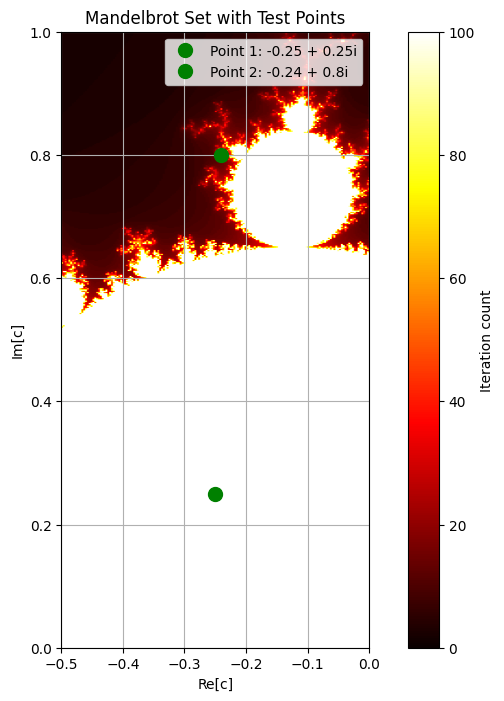

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, max_iter):
    y, x = np.ogrid[-1:1:h*1j, -2:1:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2  # radius = 2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2

    return divtime

# Create the plot
plt.figure(figsize=(10, 8))

# Generate and plot the Mandelbrot set
h, w = 1000, 1000
mandel = mandelbrot(h, w, max_iter=100)
plt.imshow(mandel, cmap='hot', extent=[-2, 1, -1, 1])

# Plot our test points
points = [
    (-0.25, 0.25, 'Point 1: -0.25 + 0.25i'),
    (-0.24, 0.8, 'Point 2: -0.24 + 0.8i')
]

for x, y, label in points:
    plt.plot(x, y, 'go', markersize=10, label=label)

plt.colorbar(label='Iteration count')
plt.grid(True)
plt.title('Mandelbrot Set with Test Points')
plt.xlabel('Re[c]')
plt.ylabel('Im[c]')
plt.legend(loc='upper right')

# Zoom in to relevant area
plt.xlim(-0.5, 0)
plt.ylim(0, 1)

plt.show()